## Проект: "Продвинутый SQL"

Проект состоит из двух частей: 
  - в первой части вы решите несколько задач в SQL-тренажёре, чтобы закрепить пройденный материал.
  - вторая часть проекта — аналитическая. Проверять задачи по-прежнему будет тренажёр. Однако мы рекомендуем самостоятельно анализировать полученные результаты и формулировать выводы.

В этом проекте нужно написать несколько SQL-запросов. Необходимые данные находятся в таблицах схемы stackoverflow - сервиса вопросов и ответов о программировании. Нужно подключиться к базе с помощью SQLAlchemy.

Вы будете работать с версией базы, где хранятся данные о постах за 2008 год, но в таблицах вы найдёте информацию и о более поздних оценках, которые эти посты получили. 

### ER-диаграмма базы:

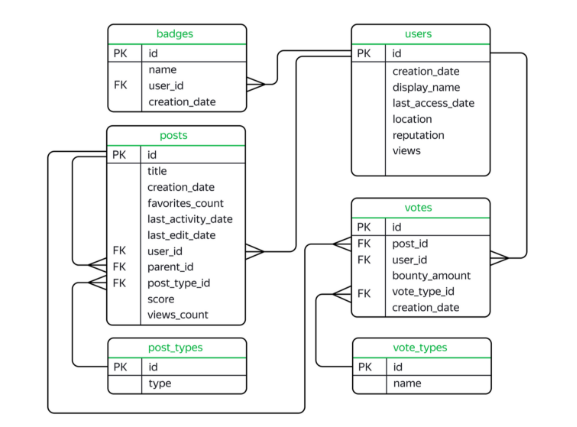

### Таблица stackoverflow.badges

Хранит информацию о значках, которые присуждаются за разные достижения. Например, пользователь, правильно ответивший на большое количество вопросов про PostgreSQL, может получить значок postgresql. 

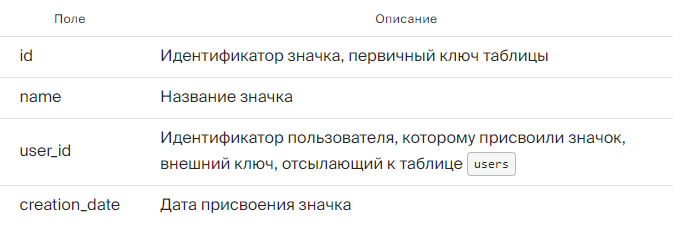

### Таблица stackoverflow.post_types

Содержит информацию о типе постов. Их может быть два:
  - Question — пост с вопросом;
  - Answer — пост с ответом.

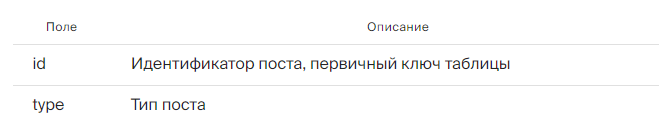

### Таблица stackoverflow.posts

Содержит информацию о постах.

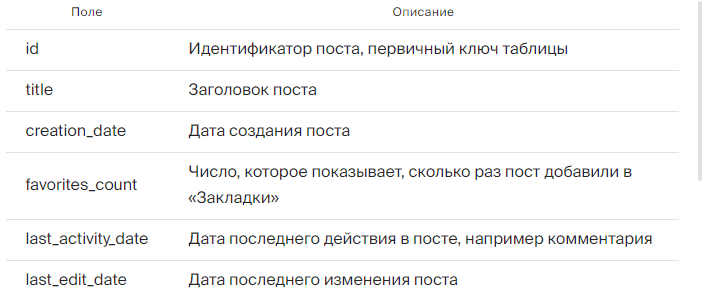
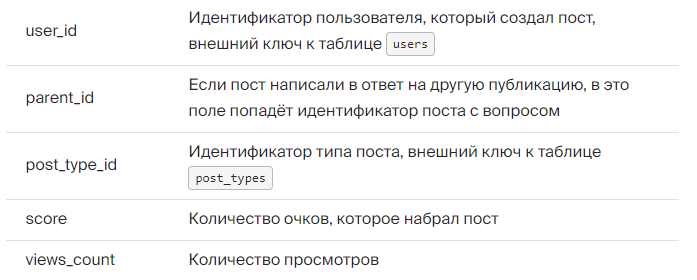

### Таблица stackoverflow.users

Содержит информацию о пользователях.

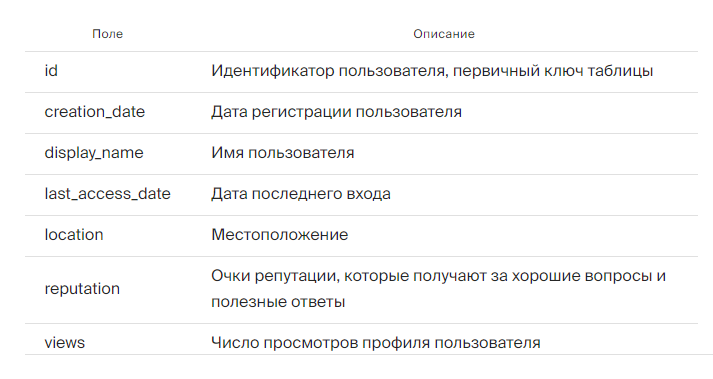

### Таблица stackoverflow.vote_types

Содержит информацию о типах голосов. Голос — это метка, которую пользователи ставят посту. 
Типов бывает несколько: 
  - UpMod — такую отметку получают посты с вопросами или ответами, которые пользователи посчитали уместными и полезными.
  - DownMod — такую отметку получают посты, которые показались пользователям наименее полезными.
  - Close — такую метку ставят опытные пользователи сервиса, если заданный вопрос нужно доработать или он вообще не подходит для платформы.
  - Offensive — такую метку могут поставить, если пользователь ответил на вопрос в грубой и оскорбительной манере, например, указав на неопытность автора поста.
  - Spam — такую метку ставят в случае, если пост пользователя выглядит откровенной рекламой.

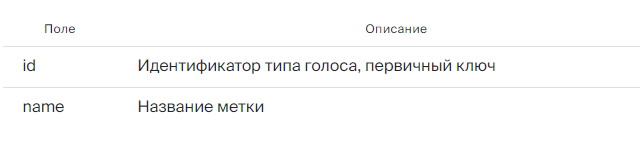

### Таблица stackoverflow.votes

Содержит информацию о голосах за посты. 

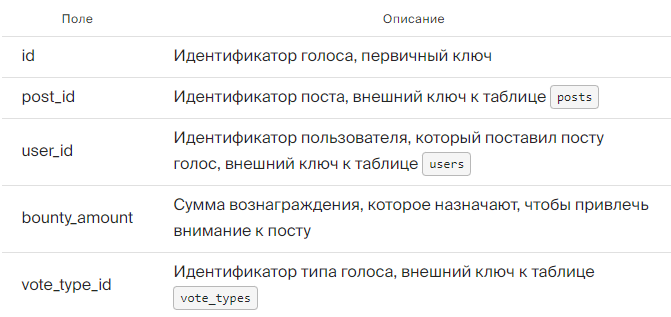
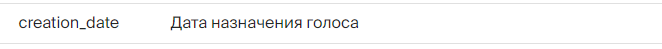

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

Создадим конфигурацию для подключения к базе данных data-analyst-advanced-sql. Эта база данных содержит схему stackoverflow, с которой мы будем работать в данном проекте.

In [49]:
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-advanced-sql' # название базы данных
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения

In [50]:
engine = create_engine(connection_string) 

## Первая часть:

## Задание 1

### Найдите количество вопросов, которые набрали больше 300 очков или как минимум 100 раз были добавлены в «Закладки».

In [51]:
query = '''
SELECT COUNT(id)
FROM stackoverflow.posts 
WHERE (score > 300 OR favorites_count >= 100) AND post_type_id = 1 

'''
count_questions = pd.read_sql_query(query, con=engine)
count_questions

,count
0,1355


## Задание 2

### Сколько в среднем в день задавали вопросов с 1 по 18 ноября 2008 включительно? Результат округлите до целого числа.

In [52]:
query = '''
SELECT ROUND(AVG(q.count), 0) 
FROM 
(SELECT COUNT(id),
       creation_date::date
 FROM stackoverflow.posts
 WHERE post_type_id = 1 
 GROUP BY creation_date::date 
 HAVING creation_date::date BETWEEN '2008-11-01' AND '2008-11-18') AS q 
'''
count_questions = pd.read_sql_query(query, con=engine)
count_questions

,round
0,383.0


### Задание 3

### Сколько пользователей получили значки сразу в день регистрации? Выведите количество уникальных пользователей.

In [53]:
query = '''
SELECT COUNT(DISTINCT b.user_id)
FROM stackoverflow.badges AS b
JOIN stackoverflow.users AS u ON u.id=b.user_id
WHERE u.creation_date::date = b.creation_date::date  
'''
count_users = pd.read_sql_query(query, con=engine)
count_users

,count
0,7047


### Задание 4

### Сколько уникальных постов пользователя с именем Joel Coehoorn получили хотя бы один голос?

In [54]:
query = '''
SELECT COUNT(cv.id)
FROM (SELECT ps.id
      FROM stackoverflow.posts AS ps
      JOIN stackoverflow.votes AS v ON ps.id=v.post_id
      JOIN stackoverflow.users AS u ON ps.user_id=u.id
      WHERE u.display_name LIKE 'Joel Coehoorn' AND v.id > 0
      GROUP BY ps.id) AS cv;
'''
posts = pd.read_sql_query(query, con=engine)
posts

,count
0,12


### Задание 5

### Выгрузите все поля таблицы vote_types. Добавьте к таблице поле rank, в которое войдут номера записей в обратном порядке. Таблица должна быть отсортирована по полю id.

In [55]:
query = '''
SELECT *,
      RANK() OVER(ORDER BY id DESC) 
FROM stackoverflow.vote_types 
ORDER BY id
'''
vote_types = pd.read_sql_query(query, con=engine)
vote_types

,id,name,rank
0,1,AcceptedByOriginator,15
1,2,UpMod,14
2,3,DownMod,13
3,4,Offensive,12
4,5,Favorite,11
5,6,Close,10
6,7,Reopen,9
7,8,BountyStart,8
8,9,BountyClose,7
9,10,Deletion,6


### Задание 6

### Отберите 10 пользователей, которые поставили больше всего голосов типа Close. Отобразите таблицу из двух полей: идентификатором пользователя и количеством голосов. Отсортируйте данные сначала по убыванию количества голосов, потом по убыванию значения идентификатора пользователя.

In [56]:
query = '''
SELECT sv.user_id,
       COUNT(sv.id) AS vote_cnt
FROM stackoverflow.users AS u
JOIN stackoverflow.votes AS sv ON u.id=sv.user_id
JOIN stackoverflow.vote_types AS svt ON sv.vote_type_id=svt.id
WHERE name LIKE 'Close'
GROUP BY sv.user_id
ORDER BY vote_cnt DESC
LIMIT 10
'''
users = pd.read_sql_query(query, con=engine)
users

,user_id,vote_cnt
0,20646,36
1,14728,36
2,27163,29
3,41158,24
4,24820,23
5,9345,23
6,3241,23
7,44330,20
8,38426,19
9,19074,19


### Задание 7

### Отберите 10 пользователей по количеству значков, полученных в период с 15 ноября по 15 декабря 2008 года включительно.

#### Отобразите несколько полей:
   - идентификатор пользователя;
   - число значков;
   - место в рейтинге — чем больше значков, тем выше рейтинг.

#### Пользователям, которые набрали одинаковое количество значков, присвойте одно и то же место в рейтинге.
#### Отсортируйте записи по количеству значков по убыванию, а затем по возрастанию значения идентификатора пользователя.

In [57]:
query = '''
SELECT u.id,
       count(DISTINCT b.id) AS znak_cnt,
       DENSE_RANK()  OVER(ORDER BY count(DISTINCT b.id) DESC) AS rating
FROM stackoverflow.users AS u
JOIN stackoverflow.badges AS b ON u.id = b.user_id
WHERE b.creation_date::date BETWEEN '2008-11-15' AND '2008-12-15'
GROUP BY u.id
ORDER BY znak_cnt DESC
LIMIT 10  
'''
users = pd.read_sql_query(query, con=engine)
users

,id,znak_cnt,rating
0,22656,149,1
1,34509,45,2
2,1288,40,3
3,5190,31,4
4,13913,30,5
5,893,28,6
6,10661,28,6
7,33213,25,7
8,12950,23,8
9,25222,20,9


### Задание 8

### Сколько в среднем очков получает пост каждого пользователя?

#### Сформируйте таблицу из следующих полей:
   - заголовок поста;
   - идентификатор пользователя;
   - число очков поста;

#### Cреднее число очков пользователя за пост, округлённое до целого числа.
#### Не учитывайте посты без заголовка, а также те, что набрали ноль очков.

In [58]:
query = '''
SELECT p.title,
       u.id,
       score,
       ROUND(AVG(score) OVER (PARTITION BY u.id))
FROM stackoverflow.posts AS p
LEFT JOIN stackoverflow.users AS u ON p.user_id = u.id  
WHERE score != 0 AND title IS NOT NULL;
'''
points = pd.read_sql_query(query, con=engine)
points

,title,id,score,round
0,Diagnosing Deadlocks in SQL Server 2005,1,82,573.0
1,How do I calculate someone's age in C#?,1,1743,573.0
2,Why doesn't IE7 copy <pre><code> blocks to the...,1,37,573.0
3,Calculate relative time in C#,1,1348,573.0
4,Wrapping StopWatch timing with a delegate or l...,1,92,573.0
...,...,...,...,...
47349,Multi-lingual projects in Visual Studio,3742716,1,1.0
47350,Change datatype when importing Excel file into...,3930756,5,5.0
47351,How to host a Silverlight app in a Sharepoint ...,4020932,8,8.0
47352,Getting counts for a paged SQL search stored p...,5696608,2,2.0


### Задание 9

### Отобразите заголовки постов, которые были написаны пользователями, получившими более 1000 значков. Посты без заголовков не должны попасть в список.

In [59]:
query = '''
SELECT title
FROM stackoverflow.posts
WHERE user_id IN (SELECT user_id
                   FROM stackoverflow.badges
                   GROUP BY user_id
                   HAVING count(id) > 1000)
      AND title IS NOT NULL;        
'''
posts = pd.read_sql_query(query, con=engine)
posts

,title
0,What's the strangest corner case you've seen i...
1,What's the hardest or most misunderstood aspec...
2,What are the correct version numbers for C#?
3,Project management to go with GitHub


### Задание 10

### Напишите запрос, который выгрузит данные о пользователях из США (англ. United States). 

#### Разделите пользователей на три группы в зависимости от количества просмотров их профилей:
   - пользователям с числом просмотров больше либо равным 350 присвойте группу 1;
   - пользователям с числом просмотров меньше 350, но больше либо равно 100 — группу 2;
   - пользователям с числом просмотров меньше 100 — группу 3.

#### Отобразите в итоговой таблице идентификатор пользователя, количество просмотров профиля и группу. Пользователи с нулевым количеством просмотров не должны войти в итоговую таблицу.

In [86]:
query = '''
SELECT id,
       views,       
    CASE 
        WHEN views >= 350 THEN 1
        WHEN views < 100 THEN 3
        ELSE 2
    END AS group  
FROM stackoverflow.users
WHERE location LIKE 'United States' AND views >0
'''
users1 = pd.read_sql_query(query, con=engine)
users1

,id,views,group
0,43,394,1
1,45,1971,1
2,64,866,1
3,67,8848,1
4,73,169,2
...,...,...,...
1475,82153,14,3
1476,386195,107,2
1477,57381,71,3
1478,85197,98,3


### Задание 11

### Дополните предыдущий запрос. Отобразите лидеров каждой группы — пользователей, которые набрали максимальное число просмотров в своей группе. 

#### Выведите поля с идентификатором пользователя, группой и количеством просмотров. Отсортируйте таблицу по убыванию просмотров, а затем по возрастанию значения идентификатора.

In [87]:
query = '''
SELECT id,
       group_number,
       views
FROM (SELECT *,
             MAX(views) OVER (PARTITION BY group_number) AS max_value
      FROM (SELECT id,
                   views,
                   CASE 
                       WHEN views >= 350 THEN 1
                       WHEN views >= 100 THEN 2
                       ELSE 3
                   END AS group_number
            FROM stackoverflow.users AS u 
            WHERE location LIKE 'United States' AND views> 0) AS a) AS foo
WHERE max_value = views
ORDER BY views DESC, id;
'''
top_users1 = pd.read_sql_query(query, con=engine)
top_users1

,id,group_number,views
0,1228,1,58635
1,9585,2,349
2,15079,2,349
3,33437,2,349
4,3469,3,99
5,4829,3,99
6,22732,3,99


### Задание 12

### Посчитайте ежедневный прирост новых пользователей в ноябре 2008 года.

#### Сформируйте таблицу с полями:
   - номер дня;
   - число пользователей, зарегистрированных в этот день;
   - сумму пользователей с накоплением.

In [88]:
query = '''
SELECT *,
       SUM(cnt_users) OVER(ORDER BY q.day) AS total_users
FROM (       
      SELECT EXTRACT(DAY FROM creation_date::date) AS day,
             COUNT(id) AS cnt_users
      FROM stackoverflow.users
      WHERE DATE_TRUNC('day', creation_date)::date BETWEEN '2008-11-01' AND '2008-11-30'
      GROUP BY EXTRACT(DAY FROM creation_date::date)) AS q
'''
tabl = pd.read_sql_query(query, con=engine)
tabl

,day,cnt_users,total_users
0,1.0,34,34.0
1,2.0,48,82.0
2,3.0,75,157.0
3,4.0,192,349.0
4,5.0,122,471.0
5,6.0,132,603.0
6,7.0,104,707.0
7,8.0,42,749.0
8,9.0,45,794.0
9,10.0,93,887.0


### Задание 13

### Для каждого пользователя, который написал хотя бы один пост, найдите интервал между регистрацией и временем создания первого поста. 
#### Отобразите:
   - идентификатор пользователя;
   - разницу во времени между регистрацией и первым постом.

In [89]:
query = '''
WITH dt AS (SELECT DISTINCT user_id,
                            MIN(creation_date) OVER (PARTITION BY user_id) AS min_dt      
            FROM stackoverflow.posts)

SELECT dt.user_id,
       (dt.min_dt - u.creation_date) AS diff
FROM stackoverflow.users AS u 
JOIN dt ON  u.id = dt.user_id;
'''
tabl = pd.read_sql_query(query, con=engine)
tabl

,user_id,diff
0,1,0 days 09:18:29
1,2,0 days 14:37:03
2,3,3 days 16:17:09
3,4,15 days 05:44:22
4,5,1 days 14:57:51
...,...,...
18844,3644960,0 days 00:00:00
18845,3742716,66 days 21:15:48
18846,3930756,8 days 02:11:55
18847,4020932,47 days 18:30:34


## Вторая часть

### Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

In [91]:
query = '''
SELECT DATE_TRUNC('month', creation_date)::DATE AS month,
       SUM(views_count)
FROM stackoverflow.posts     
WHERE DATE_TRUNC('year', creation_date) BETWEEN '2008-01-01' AND '2008-12-31' AND views_count > 0
GROUP BY month
ORDER BY SUM(views_count) DESC;
'''
sum_views = pd.read_sql_query(query, con=engine)
sum_views

,month,sum
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


Мы вывели данные по общим суммам просмотров постов за каждый месяц 2008 года. Видим, что данные за каждый месяц существенно различаются:

  - минимальное количество просмотров постов составило 670 тыс. просмотров в июле;
  - далее наблюдаем устойчивый рост количества просмотров, который достиг своего пика в сентябре и составил 453 млн.просмотров;
  - после сентября количество просмотров стабильно падает и к декабрю составляет всего 198 млню.просмотров.

Подобный всплекс активности и дальнейшее падение просмотров может быть связано со следущими факторами: неполнотой данных в июле; повышенная активность в сентябре-октябре связана с началом учебного года.

### Задание 2

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов.   
Вопросы, которые задавали пользователи, не учитывайте.   
Для каждого имени пользователя выведите количество уникальных значений user_id.  
Отсортируйте результат по полю с именами в лексикографическом порядке.

In [92]:
query = '''
SELECT u.display_name,
       COUNT(DISTINCT p.user_id)
FROM stackoverflow.posts AS p
JOIN stackoverflow.users AS u ON p.user_id=u.id
JOIN stackoverflow.post_types AS pt ON pt.id=p.post_type_id
WHERE p.creation_date::date BETWEEN u.creation_date::date AND (u.creation_date::date + INTERVAL '1 month') 
      AND pt.type LIKE 'Answer'
GROUP BY u.display_name
HAVING COUNT(p.id) > 100
ORDER BY u.display_name;
'''
names = pd.read_sql_query(query, con=engine)
names

,display_name,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
74,lomaxx,1
75,mattlant,1
76,paxdiablo,1
77,tvanfosson,1


Мы вывели имена самых активных пользователей, которые в первый месяц после регистрации дали больше 100 ответов. Если взглянуть на полный список, то можно заметить, что одному имени пользователя может соответствовать несколько уникальных значений user_id. Это довольно странно, так как предполагается, что один пользователь будет иметь только один user_id. 

Скорее всего, это достаточно популярные имена. Здесь мы видим, что данные лучше не анализировать по имени, а лучше анализировать по уникальному значению пользователя.

### Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

In [93]:
query = '''
WITH users AS (SELECT u.id
              FROM stackoverflow.users AS u
              JOIN stackoverflow.posts AS sp ON u.id=sp.user_id
              WHERE u.creation_date::DATE BETWEEN '2008-09-01' AND '2008-09-30'
              AND sp.creation_date::DATE BETWEEN '2008-12-01' AND '2008-12-31'
              GROUP BY u.id
              HAVING COUNT(sp.id) >=1)  

SELECT COUNT(p.id),
       DATE_TRUNC('month', p.creation_date)::date
FROM stackoverflow.posts AS p
WHERE p.user_id IN (SELECT *
                    FROM users)
GROUP BY DATE_TRUNC('month', p.creation_date)::date
ORDER BY DATE_TRUNC('month', p.creation_date)::date DESC;   
'''
posts = pd.read_sql_query(query, con=engine)
posts

,count,date_trunc
0,17641,2008-12-01
1,18294,2008-11-01
2,27171,2008-10-01
3,24870,2008-09-01
4,32,2008-08-01


Мы вывели количество постов за 2008 год по месяцам от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре 2008 года. Наблюдается следующая аномалия: пользователи, зарегистрированные в сентябре, были активны и в августе. Возможно, это ошибка в данных.

### Задание 4

Используя данные о постах, выведите несколько полей:
  - идентификатор пользователя, который написал пост;
  - дата создания поста;
  - количество просмотров у текущего поста;
  - сумму просмотров постов автора с накоплением.
  
Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

In [94]:
query = '''
SELECT user_id,
       creation_date,
       views_count,
       SUM(views_count) OVER(PARTITION BY user_id ORDER BY creation_date)
FROM stackoverflow.posts       
'''
posts = pd.read_sql_query(query, con=engine)
posts

,user_id,creation_date,views_count,sum
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


Вывели табл. в соответствии с условием задания: поля - идентификатор пользователя, дата создания поста, количество просмотров этого поста, сумма просмотров постов автора с накоплением.

Для расчета использована оконная функция OVER.

### Задание 5

Сколько в среднем дней в период с 1 по 7 декабря 2008 года включительно пользователи взаимодействовали с платформой?   
Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост.   
Нужно получить одно целое число — не забудьте округлить результат.  

In [95]:
query = '''
WITH q AS (SELECT user_id,
                   COUNT(DISTINCT creation_date::date)  AS days
            FROM stackoverflow.posts
            WHERE creation_date::date BETWEEN '2008-12-01' AND '2008-12-07' 
            GROUP BY user_id)
SELECT ROUND(AVG(q.days))
FROM q;
'''
days = pd.read_sql_query(query, con=engine)
days

,round
0,2.0


В среднем 2 дня взаимодействовали пользователи с платформой в период с 1 по 7 декабря 2008 года.

### Задание 6

На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года?   
Отобразите таблицу со следующими полями:
  - номер месяца;
  - количество постов за месяц;
  - процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным.   
Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип numeric.

In [96]:
query = '''
WITH posts_cnt AS (
     SELECT EXTRACT(MONTH from creation_date::date) AS post_month,
            COUNT(DISTINCT id) AS p_cnt
     FROM stackoverflow.posts 
     WHERE creation_date::date BETWEEN '2008-09-01' AND '2008-12-31'
     GROUP BY post_month
     )
SELECT *,
       ROUND((((p_cnt::numeric / LAG(p_cnt) OVER(ORDER BY post_month)) - 1)*100),2) AS diff
FROM posts_cnt 
'''
diff = pd.read_sql_query(query, con=engine)
diff

,post_month,p_cnt,diff
0,9.0,70371,NaN
1,10.0,63102,-10.33
2,11.0,46975,-25.56
3,12.0,44592,-5.07


Мы вывели распределение количества постов по месяцам - с сентября по декабрь 2008 г. с указанием разницы в %, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим. 

Построим диаграмму для более информативного отображения результатов.

In [99]:
# постром круговую диаграмму с количеством постов по месяцам
fig = go.Figure(data=[go.Pie(labels=diff['post_month'],
                             values=diff['p_cnt'])])
fig.update_traces(hoverinfo='label', textinfo='value', title = 'Количество постов по месяцам с сентября по декабрь 2008 г.')
fig.show()

### Задание 7

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:
  - номер недели;
  - дата и время последнего поста, опубликованного на этой неделе.

In [100]:
query = '''
WITH q AS (SELECT DISTINCT count(id),
                  EXTRACT(WEEK FROM creation_date) AS n_week,
                  LAST_VALUE(p.creation_date) OVER(PARTITION BY EXTRACT(WEEK FROM creation_date)) AS last_post
            FROM stackoverflow.posts AS p  
            WHERE user_id = 22656 AND creation_date::date BETWEEN '2008-10-01' AND '2008-10-31'
            GROUP BY n_week, creation_date, id)
            
SELECT DISTINCT n_week,
       last_post
FROM q
ORDER BY n_week;  
'''
users1 = pd.read_sql_query(query, con=engine)
users1

,n_week,last_post
0,40.0,2008-10-05 09:00:58
1,41.0,2008-10-12 21:22:23
2,42.0,2008-10-19 06:49:30
3,43.0,2008-10-26 21:44:36
4,44.0,2008-10-31 22:16:01


Вывели табл. с полями - номер недели пользовательской активности в октябре 2008 г., дата и время последнего поста на конкертной неделе.